In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the datasets
flood_data_path = '서울시_침수데이터_좌표포함칼럼정리한버전.xlsx'
normal_data_path = '서울시_정상데이터_강수포함.xlsx'

flood_df = pd.read_excel(flood_data_path)
normal_df = pd.read_excel(normal_data_path)

# Add the 'anomaly' column to the flood data
flood_df['anomaly'] = 1
normal_df['anomaly'] = 0

# Combine the datasets
combined_df = pd.concat([flood_df, normal_df])

# Select input and target variables
input_vars = ['침수된 지역의 평균 지형 고도', '배수정보', '일별 평균 강수량']
target_var = 'anomaly'

X = combined_df[input_vars]
y = combined_df[target_var]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the nonlinear regression model (MLPClassifier as a proxy for nonlinear regression)
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




[[ 651    2]
 [   0 1782]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       653
           1       1.00      1.00      1.00      1782

    accuracy                           1.00      2435
   macro avg       1.00      1.00      1.00      2435
weighted avg       1.00      1.00      1.00      2435



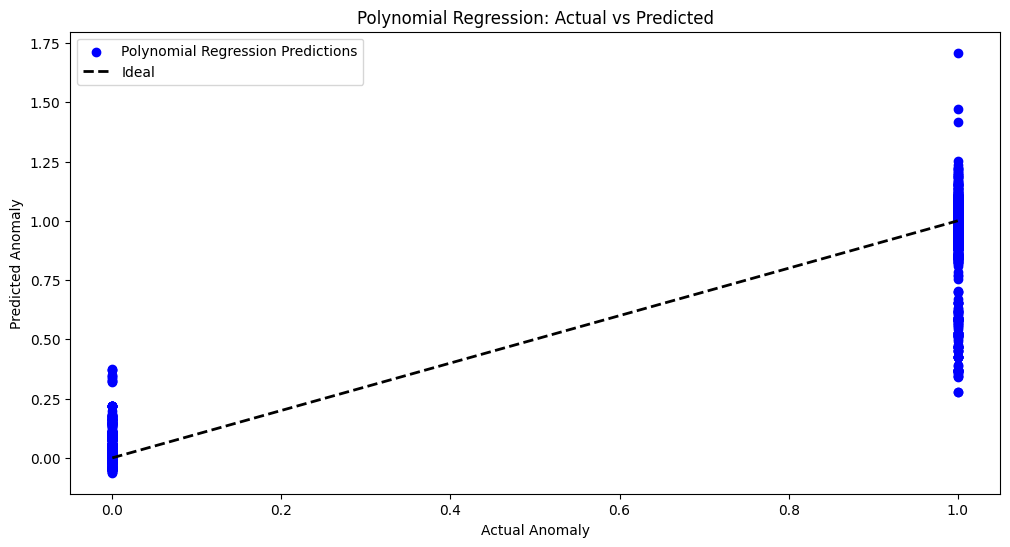

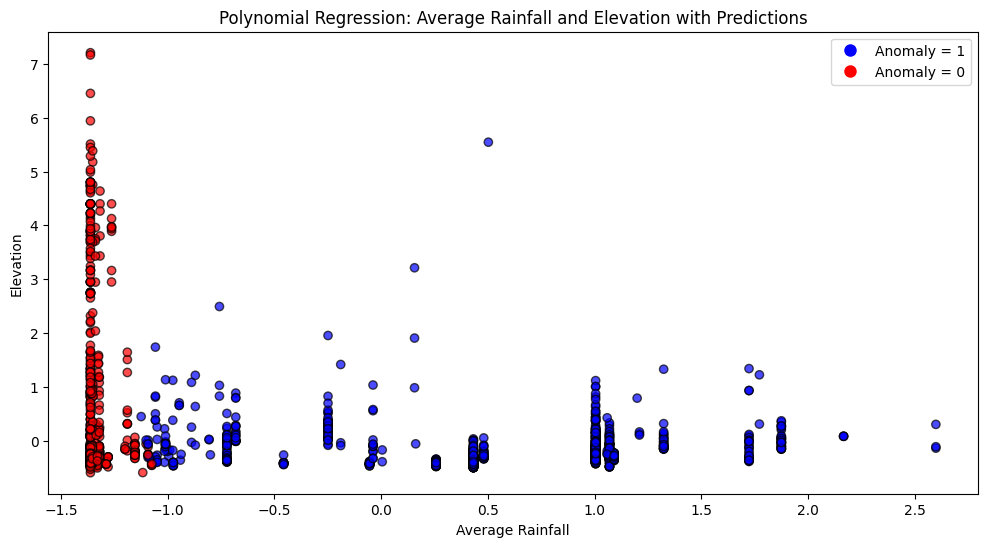

Model saved to polynomial_regression_model.pkl


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Load the datasets
flood_data_path = '서울시_침수데이터_좌표포함칼럼정리한버전.xlsx'
normal_data_path = '서울시_정상데이터_강수포함.xlsx'

flood_df = pd.read_excel(flood_data_path)
normal_df = pd.read_excel(normal_data_path)

# Add the 'anomaly' column to the flood data
flood_df['anomaly'] = 1
normal_df['anomaly'] = 0

# Combine the datasets
combined_df = pd.concat([flood_df, normal_df])

# Select input and target variables
input_vars = ['침수된 지역의 평균 지형 고도', '배수정보', '일별 평균 강수량']
target_var = 'anomaly'

X = combined_df[input_vars]
y = combined_df[target_var]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Transform features to polynomial features
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create the polynomial regression model
model = LinearRegression()

# Train the model
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Convert predictions to binary
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

# Polynomial Regression 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', label='Polynomial Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Actual Anomaly')
plt.ylabel('Predicted Anomaly')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.legend()
plt.show()

# Visualize the data points for average rainfall and elevation with predictions
plt.figure(figsize=(12, 6))
colors = ['blue' if val == 1 else 'red' for val in y_pred_binary]
plt.scatter(X_test[:, 2], X_test[:, 0], c=colors, alpha=0.7, edgecolors='k')
plt.xlabel('Average Rainfall')
plt.ylabel('Elevation')
plt.title('Polynomial Regression: Average Rainfall and Elevation with Predictions')
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Anomaly = 1', markerfacecolor='blue', markersize=10)
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Anomaly = 0', markerfacecolor='red', markersize=10)
plt.legend(handles=[blue_patch, red_patch])
plt.show()
# Save the trained model (optional)
model_path = 'polynomial_regression_model.pkl'
joblib.dump(model, model_path)

print(f"Model saved to {model_path}")


In [5]:
import matplotlib.pyplot as plt
# SVM 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_svm, color='red', label='SVM Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Actual Anomaly')
plt.ylabel('Predicted Anomaly')
plt.title('SVM Regression: Actual vs Predicted')
plt.legend()
plt.show()


NameError: name 'y_pred_svm' is not defined

<Figure size 1200x600 with 0 Axes>

SVM Regression - Mean Squared Error: 0.010189427680814279
SVM Regression - R2 Score: 0.9480809375525064


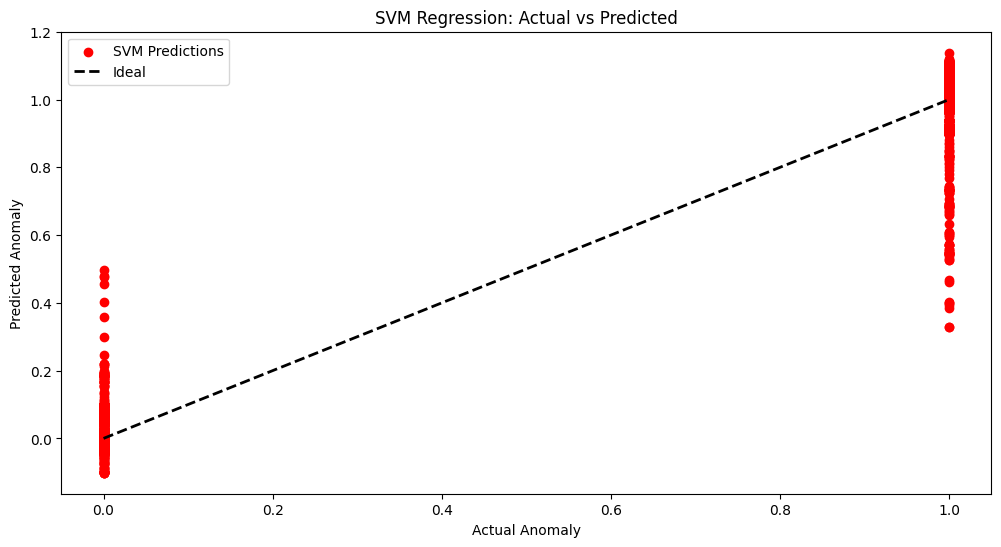

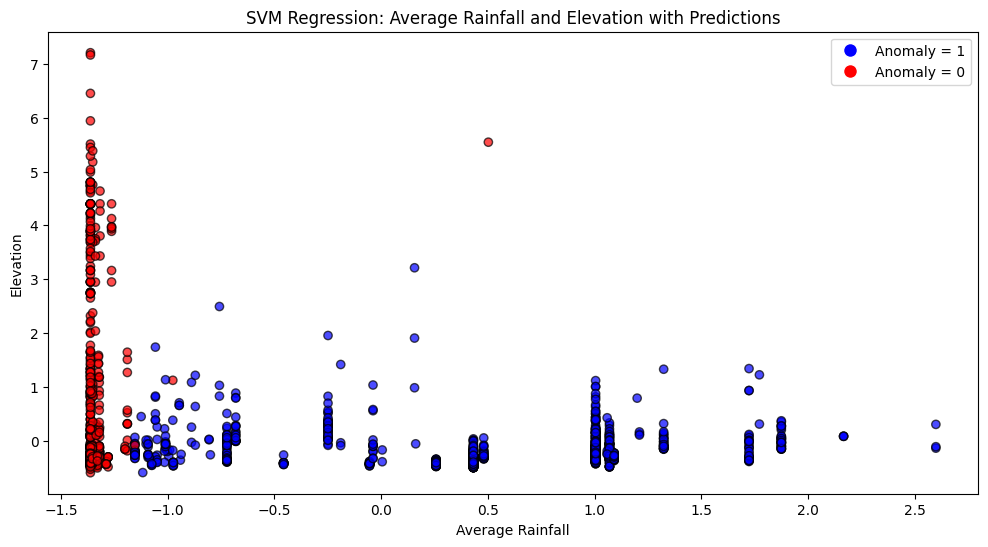

Model saved to svm_regression_model.pkl


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Load the datasets
flood_data_path = '서울시_침수데이터_좌표포함칼럼정리한버전.xlsx'
normal_data_path = '서울시_정상데이터_강수포함.xlsx'

flood_df = pd.read_excel(flood_data_path)
normal_df = pd.read_excel(normal_data_path)

# Add the 'anomaly' column to the flood data
flood_df['anomaly'] = 1
normal_df['anomaly'] = 0

# Combine the datasets
combined_df = pd.concat([flood_df, normal_df])

# Select input and target variables
input_vars = ['침수된 지역의 평균 지형 고도', '배수정보', '일별 평균 강수량']
target_var = 'anomaly'

X = combined_df[input_vars]
y = combined_df[target_var]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the SVR model
model = SVR(kernel='rbf')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_svm = model.predict(X_test)

# Convert predictions to binary
y_pred_svm_binary = [1 if x >= 0.5 else 0 for x in y_pred_svm]

# Evaluate the model
print("SVM Regression - Mean Squared Error:", mean_squared_error(y_test, y_pred_svm))
print("SVM Regression - R2 Score:", r2_score(y_test, y_pred_svm))


# SVM 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_svm, color='red', label='SVM Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Actual Anomaly')
plt.ylabel('Predicted Anomaly')
plt.title('SVM Regression: Actual vs Predicted')
plt.legend()
plt.show()

# Visualize the data points for average rainfall and elevation with predictions
plt.figure(figsize=(12, 6))
colors = ['blue' if val == 1 else 'red' for val in y_pred_svm_binary]
plt.scatter(X_test[:, 2], X_test[:, 0], c=colors, alpha=0.7, edgecolors='k')
plt.xlabel('Average Rainfall')
plt.ylabel('Elevation')
plt.title('SVM Regression: Average Rainfall and Elevation with Predictions')
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Anomaly = 1', markerfacecolor='blue', markersize=10)
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Anomaly = 0', markerfacecolor='red', markersize=10)
plt.legend(handles=[blue_patch, red_patch])
plt.show()

# Save the trained model (optional)
model_path = 'svm_regression_model.pkl'
joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

